<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/1105_%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC_03_%ED%86%A0%ED%94%BD%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **<font color='orange'> Phase 1. 데이터수집 단계**
### **1. 엑셀 시트를 읽고 파케이(parquet)형태로 저장하기**

#### **1.1. 20개 시트를 parquet로 나누어 저장하기**

### **<font color='orange'> Phase 2. 분석단계**

In [1]:
# prompt: import warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/data.pkl'

### **<font color='orange'> Phase 3. 본문에서 단어추출 후 분석단계**

In [3]:
import pandas as pd
df = pd.read_pickle(path).sample(frac=0.1)
df

,일자,본문
23478,2024-09-04,"김포시, 청소년어울림마당 '한여름 청춘 버스킹' 성료(재)김포시청소년재단 김포중봉청..."
23705,2024-09-02,[머니투데이 남미래 기자] [이 기사에 나온 스타트업에 대한 보다 다양한 기업정보는...
4794,2024-09-19,［동양일보 박승룡 기자］김영환 충북지사가 민선 8기 후반기 도정 운영을 생태환경 문...
8518,2024-09-27,"경기둘레길 ‘부천 55코스’는 부천 소사역부터 산울림청소년수련관, 경숙옹주 묘, 고..."
7473,2024-08-12,수도권 부동산 시장에서 고양시 덕양구의 강세가 두드러지고 있다. 서울 주택공급 감소...
...,...,...
1140,2024-10-08,부산시(시장 박형준)는 페스티벌 시월(FESTIVAL SHIWOL)과 연계해 올해 ...
31605,2024-08-21,아시아투데이 정아름 기자 = 부동산R114가 개인까지 부동산 컨설팅 분야를 넓힌다....
6107,2024-07-24,[이투데이] 김지영 기자 (kjy42@etoday.co.kr)\n\n 올 상반기 중...
15180,2024-08-28,"[머니투데이 유엄식 기자] 컬리 ""사실 무근, 악의적 루머""...강경 대응 예고\n..."


In [4]:
! pip install konlpy --quiet

In [5]:
from konlpy.tag import Okt
import re
from tqdm import tqdm

okt = Okt()

stopwords = ['지난', '이하']  # Add more stopwords as needed

def extract_words_from_single_article(article): # Define a function for single articles
    clean_article = re.sub(r'[^\w\s]', '', str(article))
    nouns = okt.nouns(clean_article)
    filtered_nouns = [noun for noun in nouns if len(noun) > 1 and not re.match(r'^\d', noun) and noun not in stopwords]
    return filtered_nouns

df['추출단어'] = df['본문'].apply(extract_words_from_single_article)
df

,일자,본문,추출단어
23478,2024-09-04,"김포시, 청소년어울림마당 '한여름 청춘 버스킹' 성료(재)김포시청소년재단 김포중봉청...","[김포시, 청소년, 어울림, 마당, 한여름, 청춘, 버스킹, 료재, 김포시, 청소년..."
23705,2024-09-02,[머니투데이 남미래 기자] [이 기사에 나온 스타트업에 대한 보다 다양한 기업정보는...,"[머니투데이, 남미, 기자, 기사, 스타트업, 대한, 기업, 정보, 유니콘, 팩토리..."
4794,2024-09-19,［동양일보 박승룡 기자］김영환 충북지사가 민선 8기 후반기 도정 운영을 생태환경 문...,"[동양, 일보, 박승룡, 기자, 김영환, 충북지사, 민선, 후반기, 도정, 운영, ..."
8518,2024-09-27,"경기둘레길 ‘부천 55코스’는 부천 소사역부터 산울림청소년수련관, 경숙옹주 묘, 고...","[경기, 둘레길, 부천, 코스, 부천, 소사역, 산울림, 청소년, 수련, 경숙옹주,..."
7473,2024-08-12,수도권 부동산 시장에서 고양시 덕양구의 강세가 두드러지고 있다. 서울 주택공급 감소...,"[수도권, 부동산, 시장, 고양시, 덕양구, 강세, 서울, 주택, 공급, 감소, 주..."
...,...,...,...
1140,2024-10-08,부산시(시장 박형준)는 페스티벌 시월(FESTIVAL SHIWOL)과 연계해 올해 ...,"[부산시, 시장, 박형준, 페스티벌, 시월, 계해, 올해, 처음, 부산, 글로벌, ..."
31605,2024-08-21,아시아투데이 정아름 기자 = 부동산R114가 개인까지 부동산 컨설팅 분야를 넓힌다....,"[아시아, 투데이, 정아름, 기자, 부동산, 개인, 부동산, 컨설팅, 분야, 부동산..."
6107,2024-07-24,[이투데이] 김지영 기자 (kjy42@etoday.co.kr)\n\n 올 상반기 중...,"[이투데이, 김지영, 기자, 상반기, 중기, 화장품, 수출, 대비, 증가, 해외, ..."
15180,2024-08-28,"[머니투데이 유엄식 기자] 컬리 ""사실 무근, 악의적 루머""...강경 대응 예고\n...","[머니투데이, 유엄, 기자, 컬리, 사실, 무근, 악의, 루머, 강경, 대응, 예고..."


In [6]:
# Join the list of words into a single string for each document
df['추출단어_str'] = df['추출단어'].apply(lambda x: ' '.join(x))
# 인덱스 생성
df.index = range(len(df))
df

,일자,본문,추출단어,추출단어_str
0,2024-09-04,"김포시, 청소년어울림마당 '한여름 청춘 버스킹' 성료(재)김포시청소년재단 김포중봉청...","[김포시, 청소년, 어울림, 마당, 한여름, 청춘, 버스킹, 료재, 김포시, 청소년...",김포시 청소년 어울림 마당 한여름 청춘 버스킹 료재 김포시 청소년 재단 김포 청소년...
1,2024-09-02,[머니투데이 남미래 기자] [이 기사에 나온 스타트업에 대한 보다 다양한 기업정보는...,"[머니투데이, 남미, 기자, 기사, 스타트업, 대한, 기업, 정보, 유니콘, 팩토리...",머니투데이 남미 기자 기사 스타트업 대한 기업 정보 유니콘 팩토리 빅데이터 플랫폼 ...
2,2024-09-19,［동양일보 박승룡 기자］김영환 충북지사가 민선 8기 후반기 도정 운영을 생태환경 문...,"[동양, 일보, 박승룡, 기자, 김영환, 충북지사, 민선, 후반기, 도정, 운영, ...",동양 일보 박승룡 기자 김영환 충북지사 민선 후반기 도정 운영 생태 환경 문제 중점...
3,2024-09-27,"경기둘레길 ‘부천 55코스’는 부천 소사역부터 산울림청소년수련관, 경숙옹주 묘, 고...","[경기, 둘레길, 부천, 코스, 부천, 소사역, 산울림, 청소년, 수련, 경숙옹주,...",경기 둘레길 부천 코스 부천 소사역 산울림 청소년 수련 경숙옹주 강선 사유 공원 지...
4,2024-08-12,수도권 부동산 시장에서 고양시 덕양구의 강세가 두드러지고 있다. 서울 주택공급 감소...,"[수도권, 부동산, 시장, 고양시, 덕양구, 강세, 서울, 주택, 공급, 감소, 주...",수도권 부동산 시장 고양시 덕양구 강세 서울 주택 공급 감소 주택 신축 선호 현상 ...
...,...,...,...,...
1776,2024-10-08,부산시(시장 박형준)는 페스티벌 시월(FESTIVAL SHIWOL)과 연계해 올해 ...,"[부산시, 시장, 박형준, 페스티벌, 시월, 계해, 올해, 처음, 부산, 글로벌, ...",부산시 시장 박형준 페스티벌 시월 계해 올해 처음 부산 글로벌 데이터 해커 대회 다...
1777,2024-08-21,아시아투데이 정아름 기자 = 부동산R114가 개인까지 부동산 컨설팅 분야를 넓힌다....,"[아시아, 투데이, 정아름, 기자, 부동산, 개인, 부동산, 컨설팅, 분야, 부동산...",아시아 투데이 정아름 기자 부동산 개인 부동산 컨설팅 분야 부동산 부동산 컨설팅 서...
1778,2024-07-24,[이투데이] 김지영 기자 (kjy42@etoday.co.kr)\n\n 올 상반기 중...,"[이투데이, 김지영, 기자, 상반기, 중기, 화장품, 수출, 대비, 증가, 해외, ...",이투데이 김지영 기자 상반기 중기 화장품 수출 대비 증가 해외 수출 규제 뷰티 생태...
1779,2024-08-28,"[머니투데이 유엄식 기자] 컬리 ""사실 무근, 악의적 루머""...강경 대응 예고\n...","[머니투데이, 유엄, 기자, 컬리, 사실, 무근, 악의, 루머, 강경, 대응, 예고...",머니투데이 유엄 기자 컬리 사실 무근 악의 루머 강경 대응 예고 정산 주기 연장 조...


### **Corpus 추출방법**
#### 2가지 방법

In [9]:
# prompt: 추출단어_str 를 리스트 corpus로 만들기
# https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html --> corpus와 같은 형태
#
corpus = df['추출단어_str'].tolist()
corpus[:10]

['김포시 청소년 어울림 마당 한여름 청춘 버스킹 료재 김포시 청소년 재단 김포 청소년 수련 한강 신도시 호수 공원 김포시 청소년 어울림 마당 한여름 청춘 버스킹 이번 행사 공연 주제 댄스 보컬 밴드 장르 청소년 공연 개팀 문화',
 '머니투데이 남미 기자 기사 스타트업 대한 기업 정보 유니콘 팩토리 빅데이터 플랫폼 데이터 인공 지능 기업 마크 브랜드 지식 재산권 보호 오프라인 서비스 일환 세관 단속 지원 서비스 신규 출시 마크 기술 활용 세계',
 '동양 일보 박승룡 기자 김영환 충북지사 민선 후반기 도정 운영 생태 환경 문제 중점 지사 도청 회의실 국장 회의 충북 미래 위해 가운데 생태 환경 문제 라며 개선 노력 도정 중심 강조 충북 생태 환경 초점',
 '경기 둘레길 부천 코스 부천 소사역 산울림 청소년 수련 경숙옹주 강선 사유 공원 지나 부천 오정 공원 구간 길이 예상 소요 시간 걷기 난이도 중간 분류 부천 소사역 걷기 시작 소사 우리나라 처음 복숭아 재배 시작 지역 일명',
 '수도권 부동산 시장 고양시 덕양구 강세 서울 주택 공급 감소 주택 신축 선호 현상 주요 원인 신고 가가 속출 모습 국토교통부 거래 고양시 덕양구 은동 한강 에일 전용 면적 지난달 고가 경신 전달 직전',
 '쉴더스 미국 무선 통신사 버라이즌 전략 파트너 체결 글로벌 시장 공략 박차 양사 이번 파트너 체결 글로벌 침해사고 신속 대응 원격 보안 관제 서비스 고도화 모의 해킹 취약점 진단 서비스 공동 제공 방위 협력 우선 보안 환경 지능 위협 신속 대응 침해사고 공동 대응',
 '뉴스 최현 기자 올해 가을 분양 시장 개막 추석 연휴 가운데 추석 이후 가구 이상 단지 대거 공급 사진 더피알 부동산 시장 분석 업체 부동산 인포 추석 이후 전국 가구 이상 단지 가구',
 '스웨덴 한림원 노벨 문학상 수상자 우리나라 소설가 한강 작가 선정 한국인 노벨상 평화상 김대중 대통령 사진 연합뉴스 국문학 번역 한강 작가 노벨 문학상 수상 한국 문학 해외 지속 소개 노력',
 '국립 금오공대 기계 시

In [10]:
# prompt: "지난", "이하" 등의 단어는 stopword로

from konlpy.tag import Okt
import re
from tqdm import tqdm

okt = Okt()

stopwords = ['지난', '이하']  # Add more stopwords as needed

def extract_words_from_corpus(df):
    corpus = []
    for idx, article in tqdm(df['본문'].items(), total=len(df['본문']), desc='Extracting words'):
        # 텍스트 정제 (특수 문자 제거)
        clean_article = re.sub(r'[^\w\s]', '', str(article))

        # 형태소 분석을 통해 명사 추출
        nouns = okt.nouns(clean_article)

        # 길이가 1인 단어, 아라비아 숫자로 시작하는 단어, 불용어 제거
        filtered_nouns = [noun for noun in nouns if len(noun) > 1 and not re.match(r'^\d', noun) and noun not in stopwords]
        corpus.extend(filtered_nouns)
    return corpus
# Example usage (no changes here):
corpus_other = extract_words_from_corpus(df)
print(f"Corpus created successfully with {len(corpus_other)} words")
corpus_other[:10]

Extracting words: 100%|██████████| 1781/1781 [00:23<00:00, 74.80it/s]

Corpus created successfully with 62901 words


['김포시', '청소년', '어울림', '마당', '한여름', '청춘', '버스킹', '료재', '김포시', '청소년']

In [11]:
corpus[0][:40]

'김포시 청소년 어울림 마당 한여름 청춘 버스킹 료재 김포시 청소년 재단 '

### **<font color='orange'> Phase 5. LDA 분석단계**

In [12]:
import gensim
from gensim import corpora
from pprint import pprint

In [13]:
# 텍스트 전처리 단계
# gensim.utils.simple_preprocess(text) :
# Gensim 라이브러리에서 제공하는 함수로, 입력 텍스트를 간단히 토큰화하고 소문자로 변환합니다. 구두점이나 특수문자는 자동으로 제거
def preprocess(text):
    return [word for word in gensim.utils.simple_preprocess(text) if word not in gensim.parsing.preprocessing.STOPWORDS]

# word not in gensim.parsing.preprocessing.STOPWORDS: 이 부분은 불용어(stopwords)를 제거하는 역할
# 불용어는 "그리고", "있다", "없다" 같은 분석에 큰 의미가 없는 단어들


# Corpus를 documents로
documents = df['추출단어_str'].tolist()
documents[:3]

['김포시 청소년 어울림 마당 한여름 청춘 버스킹 료재 김포시 청소년 재단 김포 청소년 수련 한강 신도시 호수 공원 김포시 청소년 어울림 마당 한여름 청춘 버스킹 이번 행사 공연 주제 댄스 보컬 밴드 장르 청소년 공연 개팀 문화',
 '머니투데이 남미 기자 기사 스타트업 대한 기업 정보 유니콘 팩토리 빅데이터 플랫폼 데이터 인공 지능 기업 마크 브랜드 지식 재산권 보호 오프라인 서비스 일환 세관 단속 지원 서비스 신규 출시 마크 기술 활용 세계',
 '동양 일보 박승룡 기자 김영환 충북지사 민선 후반기 도정 운영 생태 환경 문제 중점 지사 도청 회의실 국장 회의 충북 미래 위해 가운데 생태 환경 문제 라며 개선 노력 도정 중심 강조 충북 생태 환경 초점']

In [14]:

# 문서 전처리 (영어는 직접 문장을 입력하지만 한글이라 단어만 추출하고 입력--> 한글은 텍스트전처리작업이 필요)
processed_docs = [preprocess(doc) for doc in documents]
processed_docs[:3]

[['김포시',
  '청소년',
  '어울림',
  '마당',
  '한여름',
  '청춘',
  '버스킹',
  '료재',
  '김포시',
  '청소년',
  '재단',
  '김포',
  '청소년',
  '수련',
  '한강',
  '신도시',
  '호수',
  '공원',
  '김포시',
  '청소년',
  '어울림',
  '마당',
  '한여름',
  '청춘',
  '버스킹',
  '이번',
  '행사',
  '공연',
  '주제',
  '댄스',
  '보컬',
  '밴드',
  '장르',
  '청소년',
  '공연',
  '개팀',
  '문화'],
 ['머니투데이',
  '남미',
  '기자',
  '기사',
  '스타트업',
  '대한',
  '기업',
  '정보',
  '유니콘',
  '팩토리',
  '빅데이터',
  '플랫폼',
  '데이터',
  '인공',
  '지능',
  '기업',
  '마크',
  '브랜드',
  '지식',
  '재산권',
  '보호',
  '오프라인',
  '서비스',
  '일환',
  '세관',
  '단속',
  '지원',
  '서비스',
  '신규',
  '출시',
  '마크',
  '기술',
  '활용',
  '세계'],
 ['동양',
  '일보',
  '박승룡',
  '기자',
  '김영환',
  '충북지사',
  '민선',
  '후반기',
  '도정',
  '운영',
  '생태',
  '환경',
  '문제',
  '중점',
  '지사',
  '도청',
  '회의실',
  '국장',
  '회의',
  '충북',
  '미래',
  '위해',
  '가운데',
  '생태',
  '환경',
  '문제',
  '라며',
  '개선',
  '노력',
  '도정',
  '중심',
  '강조',
  '충북',
  '생태',
  '환경',
  '초점']]


### **Gensim 라이브러리를 사용하여 단어 집합(dictionary)을 생성하고, 이를 통해 말뭉치(corpus)를 만드는 과정**

- corpora.Dictionary(processed_docs): gensim.corpora.Dictionary를 사용하여 각 단어에 고유 ID를 부여하는 "단어 집합(Dictionary)"을 생성
- 데이터셋 내에 있는 모든 고유 단어들을 추출하고, 그 단어들에 인덱스 번호를 부여
- Dictionary 객체는 말 그대로 텍스트의 고유한 단어들을 모아놓은 사전 역할을 하며, 각 단어에 대한 ID와 해당 단어의 빈도를 관리

In [16]:

# 단어 집합 생성
dictionary = corpora.Dictionary(processed_docs)

# 말뭉치 생성
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
corpus[:1]

[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 3),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 1),
  (10, 2),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 2),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 5),
  (20, 2),
  (21, 1),
  (22, 2),
  (23, 1),
  (24, 1)]]

### doc2bow(doc):
- "Bag of Words (BoW)" 모델을 사용하여 문서를 벡터화
- BoW는 각 문서에서 단어가 몇 번 등장하는지를 빈도 수로 나타낸 것
- doc2bow 메서드는 입력된 문서(단어 리스트)에 대해 해당 단어가 얼마나 등장했는지 나타내는 튜플 (단어 ID, 빈도 수)의 리스트를 반환
= 예를 들어, 문서 내 특정 단어가 ID 1을 갖고 3번 등장하면 (1, 3) 형태로 표현

In [19]:
df['corpus'] = corpus
df

,일자,본문,추출단어,추출단어_str,corpus
0,2024-09-04,"김포시, 청소년어울림마당 '한여름 청춘 버스킹' 성료(재)김포시청소년재단 김포중봉청...","[김포시, 청소년, 어울림, 마당, 한여름, 청춘, 버스킹, 료재, 김포시, 청소년...",김포시 청소년 어울림 마당 한여름 청춘 버스킹 료재 김포시 청소년 재단 김포 청소년...,"[(0, 1), (1, 2), (2, 1), (3, 1), (4, 3), (5, 1..."
1,2024-09-02,[머니투데이 남미래 기자] [이 기사에 나온 스타트업에 대한 보다 다양한 기업정보는...,"[머니투데이, 남미, 기자, 기사, 스타트업, 대한, 기업, 정보, 유니콘, 팩토리...",머니투데이 남미 기자 기사 스타트업 대한 기업 정보 유니콘 팩토리 빅데이터 플랫폼 ...,"[(25, 1), (26, 1), (27, 2), (28, 1), (29, 1), ..."
2,2024-09-19,［동양일보 박승룡 기자］김영환 충북지사가 민선 8기 후반기 도정 운영을 생태환경 문...,"[동양, 일보, 박승룡, 기자, 김영환, 충북지사, 민선, 후반기, 도정, 운영, ...",동양 일보 박승룡 기자 김영환 충북지사 민선 후반기 도정 운영 생태 환경 문제 중점...,"[(28, 1), (56, 1), (57, 1), (58, 1), (59, 1), ..."
3,2024-09-27,"경기둘레길 ‘부천 55코스’는 부천 소사역부터 산울림청소년수련관, 경숙옹주 묘, 고...","[경기, 둘레길, 부천, 코스, 부천, 소사역, 산울림, 청소년, 수련, 경숙옹주,...",경기 둘레길 부천 코스 부천 소사역 산울림 청소년 수련 경숙옹주 강선 사유 공원 지...,"[(2, 2), (12, 1), (19, 1), (84, 1), (85, 2), (..."
4,2024-08-12,수도권 부동산 시장에서 고양시 덕양구의 강세가 두드러지고 있다. 서울 주택공급 감소...,"[수도권, 부동산, 시장, 고양시, 덕양구, 강세, 서울, 주택, 공급, 감소, 주...",수도권 부동산 시장 고양시 덕양구 강세 서울 주택 공급 감소 주택 신축 선호 현상 ...,"[(21, 1), (112, 1), (113, 1), (114, 1), (115, ..."
...,...,...,...,...,...
1776,2024-10-08,부산시(시장 박형준)는 페스티벌 시월(FESTIVAL SHIWOL)과 연계해 올해 ...,"[부산시, 시장, 박형준, 페스티벌, 시월, 계해, 올해, 처음, 부산, 글로벌, ...",부산시 시장 박형준 페스티벌 시월 계해 올해 처음 부산 글로벌 데이터 해커 대회 다...,"[(32, 1), (110, 1), (129, 1), (146, 1), (183, ..."
1777,2024-08-21,아시아투데이 정아름 기자 = 부동산R114가 개인까지 부동산 컨설팅 분야를 넓힌다....,"[아시아, 투데이, 정아름, 기자, 부동산, 개인, 부동산, 컨설팅, 분야, 부동산...",아시아 투데이 정아름 기자 부동산 개인 부동산 컨설팅 분야 부동산 부동산 컨설팅 서...,"[(27, 3), (28, 1), (38, 2), (124, 4), (184, 2)..."
1778,2024-07-24,[이투데이] 김지영 기자 (kjy42@etoday.co.kr)\n\n 올 상반기 중...,"[이투데이, 김지영, 기자, 상반기, 중기, 화장품, 수출, 대비, 증가, 해외, ...",이투데이 김지영 기자 상반기 중기 화장품 수출 대비 증가 해외 수출 규제 뷰티 생태...,"[(27, 1), (28, 1), (36, 1), (39, 1), (51, 1), ..."
1779,2024-08-28,"[머니투데이 유엄식 기자] 컬리 ""사실 무근, 악의적 루머""...강경 대응 예고\n...","[머니투데이, 유엄, 기자, 컬리, 사실, 무근, 악의, 루머, 강경, 대응, 예고...",머니투데이 유엄 기자 컬리 사실 무근 악의 루머 강경 대응 예고 정산 주기 연장 조...,"[(25, 1), (27, 1), (28, 1), (31, 1), (32, 1), ..."


In [20]:
# LDA 모델 학습
lda_model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=dictionary,
                                   num_topics=3,  # 추출할 주제 개수
                                   random_state=42,
                                   passes=10,
                                   # 학습 데이터인 corpus를 전체 모델 학습에서 10번 반복하여 모델에 입력합니다.
                                   # 더 많은 패스를 사용하면 모델이 문서의 주제를 더 잘 학습할 가능성이 있지만, 학습 시간이 더 오래 걸릴 수 있습
                                   iterations=100
                                   # 각 패스에서 모델이 최적의 매개변수를 찾기 위해 반복하는 횟수를 지정
                                   )

# 주제 출력
pprint(lda_model.print_topics())

[(0,
  '0.012*"서울" + 0.009*"기자" + 0.007*"한강" + 0.006*"시장" + 0.005*"아파트" + '
  '0.004*"축제" + 0.004*"서울시" + 0.004*"공원" + 0.004*"기업" + 0.004*"센터"'),
 (1,
  '0.008*"서울" + 0.006*"한강" + 0.006*"기자" + 0.005*"아파트" + 0.005*"분양" + '
  '0.005*"가구" + 0.004*"단지" + 0.004*"사업" + 0.003*"스마트" + 0.003*"건설"'),
 (2,
  '0.016*"한강" + 0.011*"기자" + 0.010*"기업" + 0.010*"데이터" + 0.009*"한국" + '
  '0.008*"빅데이터" + 0.007*"플랫폼" + 0.007*"작가" + 0.006*"사업" + 0.006*"스타트업"')]


In [21]:
# prompt: LDA시각화

!pip install pyLDAvis --quiet

import pyLDAvis.gensim_models

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.108005  0.029099       1        1  42.508296
0     -0.024440 -0.094282       2        1  29.158431
1     -0.083566  0.065183       3        1  28.333273, topic_info=      Term        Freq       Total Category  logprob  loglift
205     작가  201.000000  201.000000  Default  30.0000  30.0000
32     데이터  305.000000  305.000000  Default  29.0000  29.0000
171     가구   90.000000   90.000000  Default  28.0000  28.0000
812    아파트  182.000000  182.000000  Default  27.0000  27.0000
247  노벨문학상  120.000000  120.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
716     사회   36.397310   86.969506   Topic3  -6.1937   0.3901
37    빅데이터   47.509371  324.208820   Topic3  -5.9273  -0.6593
259     통해   40.125081  147.613904   Topic3  -6.0962  -0.0415
38     서비스   40.641294  171.945967   Topic3  -6.0834  -0.1813
208     한국   43.207067  354.422539   Topic3  -6.0222  -0.8434

[265 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
557       1  0.042690    가격
557       2  0.811106    가격
557       3  0.142299    가격
171       1  0.011017    가구
171       2  0.088134    가구
...     ...       ...   ...
572       2  0.948095  홈플러스
55        1  0.638186    활용
55        2  0.217115    활용
55        3  0.144743    활용
6113      2  0.911440    효성

[454 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

#### **가장 적합한 토픽의 개수를 구한다 : 여기서는 3개라고 가정**

In [22]:
# prompt: corpus의 각각에 topic에 속할 확률과 이 가장 높은 토픽명을 구하고 df애 새로운 컬럼을 각각 만들어라

import pandas as pd
import numpy as np

# 각 문서별 토픽 분포 확률
topic_probs = lda_model.get_document_topics(corpus, minimum_probability=0.0)

# 새로운 컬럼 생성
topic_probs_df = pd.DataFrame(topic_probs)

# 각 토픽의 확률 값을 새로운 컬럼으로 추가
for i in range(3):  # topic 수 만큼 반복
    df[f'topic_{i}_prob'] = topic_probs_df.apply(lambda x: x[i][1] if len(x) > i and isinstance(x[i],tuple) else 0 ,axis=1)

# 가장 높은 토픽 확률 및 토픽 이름
df['dominant_topic'] = topic_probs_df.apply(lambda x: np.argmax([prob for _, prob in x]), axis=1)

# 예시로, 토픽 0에 해당하는 토픽 이름(topic_0_name)이라고 가정
# 실제 토픽 이름은 lda_model.print_topics() 결과에서 추출해야 합니다.
topic_names = ['topic_0', 'topic_1', 'topic_2']  # 적절히 수정
df['dominant_topic_name'] = df['dominant_topic'].map({i: topic_names[i] for i in range(3)})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,일자,본문,추출단어,추출단어_str,corpus,topic_0_prob,topic_1_prob,topic_2_prob,dominant_topic,dominant_topic_name
0,2024-09-04,"김포시, 청소년어울림마당 '한여름 청춘 버스킹' 성료(재)김포시청소년재단 김포중봉청...","[김포시, 청소년, 어울림, 마당, 한여름, 청춘, 버스킹, 료재, 김포시, 청소년...",김포시 청소년 어울림 마당 한여름 청춘 버스킹 료재 김포시 청소년 재단 김포 청소년...,"[(0, 1), (1, 2), (2, 1), (3, 1), (4, 3), (5, 1...",0.009974,0.979574,0.010452,1,topic_1
1,2024-09-02,[머니투데이 남미래 기자] [이 기사에 나온 스타트업에 대한 보다 다양한 기업정보는...,"[머니투데이, 남미, 기자, 기사, 스타트업, 대한, 기업, 정보, 유니콘, 팩토리...",머니투데이 남미 기자 기사 스타트업 대한 기업 정보 유니콘 팩토리 빅데이터 플랫폼 ...,"[(25, 1), (26, 1), (27, 2), (28, 1), (29, 1), ...",0.262565,0.010235,0.727200,2,topic_2
2,2024-09-19,［동양일보 박승룡 기자］김영환 충북지사가 민선 8기 후반기 도정 운영을 생태환경 문...,"[동양, 일보, 박승룡, 기자, 김영환, 충북지사, 민선, 후반기, 도정, 운영, ...",동양 일보 박승룡 기자 김영환 충북지사 민선 후반기 도정 운영 생태 환경 문제 중점...,"[(28, 1), (56, 1), (57, 1), (58, 1), (59, 1), ...",0.010107,0.979523,0.010370,1,topic_1
3,2024-09-27,"경기둘레길 ‘부천 55코스’는 부천 소사역부터 산울림청소년수련관, 경숙옹주 묘, 고...","[경기, 둘레길, 부천, 코스, 부천, 소사역, 산울림, 청소년, 수련, 경숙옹주,...",경기 둘레길 부천 코스 부천 소사역 산울림 청소년 수련 경숙옹주 강선 사유 공원 지...,"[(2, 2), (12, 1), (19, 1), (84, 1), (85, 2), (...",0.433531,0.557249,0.009220,1,topic_1
4,2024-08-12,수도권 부동산 시장에서 고양시 덕양구의 강세가 두드러지고 있다. 서울 주택공급 감소...,"[수도권, 부동산, 시장, 고양시, 덕양구, 강세, 서울, 주택, 공급, 감소, 주...",수도권 부동산 시장 고양시 덕양구 강세 서울 주택 공급 감소 주택 신축 선호 현상 ...,"[(21, 1), (112, 1), (113, 1), (114, 1), (115, ...",0.792634,0.197277,0.010090,0,topic_0
...,...,...,...,...,...,...,...,...,...,...
1776,2024-10-08,부산시(시장 박형준)는 페스티벌 시월(FESTIVAL SHIWOL)과 연계해 올해 ...,"[부산시, 시장, 박형준, 페스티벌, 시월, 계해, 올해, 처음, 부산, 글로벌, ...",부산시 시장 박형준 페스티벌 시월 계해 올해 처음 부산 글로벌 데이터 해커 대회 다...,"[(32, 1), (110, 1), (129, 1), (146, 1), (183, ...",0.965434,0.015533,0.019033,0,topic_0
1777,2024-08-21,아시아투데이 정아름 기자 = 부동산R114가 개인까지 부동산 컨설팅 분야를 넓힌다....,"[아시아, 투데이, 정아름, 기자, 부동산, 개인, 부동산, 컨설팅, 분야, 부동산...",아시아 투데이 정아름 기자 부동산 개인 부동산 컨설팅 분야 부동산 부동산 컨설팅 서...,"[(27, 3), (28, 1), (38, 2), (124, 4), (184, 2)...",0.802462,0.010809,0.186730,0,topic_0
1778,2024-07-24,[이투데이] 김지영 기자 (kjy42@etoday.co.kr)\n\n 올 상반기 중...,"[이투데이, 김지영, 기자, 상반기, 중기, 화장품, 수출, 대비, 증가, 해외, ...",이투데이 김지영 기자 상반기 중기 화장품 수출 대비 증가 해외 수출 규제 뷰티 생태...,"[(27, 1), (28, 1), (36, 1), (39, 1), (51, 1), ...",0.242962,0.197161,0.559877,2,topic_2
1779,2024-08-28,"[머니투데이 유엄식 기자] 컬리 ""사실 무근, 악의적 루머""...강경 대응 예고\n...","[머니투데이, 유엄, 기자, 컬리, 사실, 무근, 악의, 루머, 강경, 대응, 예고...",머니투데이 유엄 기자 컬리 사실 무근 악의 루머 강경 대응 예고 정산 주기 연장 조...,"[(25, 1), (27, 1), (28, 1), (31, 1), (32, 1), ...",0.898569,0.009192,0.092239,0,topic_0


In [24]:
df.set_index('일자', inplace= True)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,본문,추출단어,추출단어_str,corpus,topic_0_prob,topic_1_prob,topic_2_prob,dominant_topic,dominant_topic_name
일자,,,,,,,,,
2024-09-04,"김포시, 청소년어울림마당 '한여름 청춘 버스킹' 성료(재)김포시청소년재단 김포중봉청...","[김포시, 청소년, 어울림, 마당, 한여름, 청춘, 버스킹, 료재, 김포시, 청소년...",김포시 청소년 어울림 마당 한여름 청춘 버스킹 료재 김포시 청소년 재단 김포 청소년...,"[(0, 1), (1, 2), (2, 1), (3, 1), (4, 3), (5, 1...",0.009974,0.979574,0.010452,1,topic_1
2024-09-02,[머니투데이 남미래 기자] [이 기사에 나온 스타트업에 대한 보다 다양한 기업정보는...,"[머니투데이, 남미, 기자, 기사, 스타트업, 대한, 기업, 정보, 유니콘, 팩토리...",머니투데이 남미 기자 기사 스타트업 대한 기업 정보 유니콘 팩토리 빅데이터 플랫폼 ...,"[(25, 1), (26, 1), (27, 2), (28, 1), (29, 1), ...",0.262565,0.010235,0.727200,2,topic_2
2024-09-19,［동양일보 박승룡 기자］김영환 충북지사가 민선 8기 후반기 도정 운영을 생태환경 문...,"[동양, 일보, 박승룡, 기자, 김영환, 충북지사, 민선, 후반기, 도정, 운영, ...",동양 일보 박승룡 기자 김영환 충북지사 민선 후반기 도정 운영 생태 환경 문제 중점...,"[(28, 1), (56, 1), (57, 1), (58, 1), (59, 1), ...",0.010107,0.979523,0.010370,1,topic_1
2024-09-27,"경기둘레길 ‘부천 55코스’는 부천 소사역부터 산울림청소년수련관, 경숙옹주 묘, 고...","[경기, 둘레길, 부천, 코스, 부천, 소사역, 산울림, 청소년, 수련, 경숙옹주,...",경기 둘레길 부천 코스 부천 소사역 산울림 청소년 수련 경숙옹주 강선 사유 공원 지...,"[(2, 2), (12, 1), (19, 1), (84, 1), (85, 2), (...",0.433531,0.557249,0.009220,1,topic_1
2024-08-12,수도권 부동산 시장에서 고양시 덕양구의 강세가 두드러지고 있다. 서울 주택공급 감소...,"[수도권, 부동산, 시장, 고양시, 덕양구, 강세, 서울, 주택, 공급, 감소, 주...",수도권 부동산 시장 고양시 덕양구 강세 서울 주택 공급 감소 주택 신축 선호 현상 ...,"[(21, 1), (112, 1), (113, 1), (114, 1), (115, ...",0.792634,0.197277,0.010090,0,topic_0
...,...,...,...,...,...,...,...,...,...
2024-10-08,부산시(시장 박형준)는 페스티벌 시월(FESTIVAL SHIWOL)과 연계해 올해 ...,"[부산시, 시장, 박형준, 페스티벌, 시월, 계해, 올해, 처음, 부산, 글로벌, ...",부산시 시장 박형준 페스티벌 시월 계해 올해 처음 부산 글로벌 데이터 해커 대회 다...,"[(32, 1), (110, 1), (129, 1), (146, 1), (183, ...",0.965434,0.015533,0.019033,0,topic_0
2024-08-21,아시아투데이 정아름 기자 = 부동산R114가 개인까지 부동산 컨설팅 분야를 넓힌다....,"[아시아, 투데이, 정아름, 기자, 부동산, 개인, 부동산, 컨설팅, 분야, 부동산...",아시아 투데이 정아름 기자 부동산 개인 부동산 컨설팅 분야 부동산 부동산 컨설팅 서...,"[(27, 3), (28, 1), (38, 2), (124, 4), (184, 2)...",0.802462,0.010809,0.186730,0,topic_0
2024-07-24,[이투데이] 김지영 기자 (kjy42@etoday.co.kr)\n\n 올 상반기 중...,"[이투데이, 김지영, 기자, 상반기, 중기, 화장품, 수출, 대비, 증가, 해외, ...",이투데이 김지영 기자 상반기 중기 화장품 수출 대비 증가 해외 수출 규제 뷰티 생태...,"[(27, 1), (28, 1), (36, 1), (39, 1), (51, 1), ...",0.242962,0.197161,0.559877,2,topic_2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


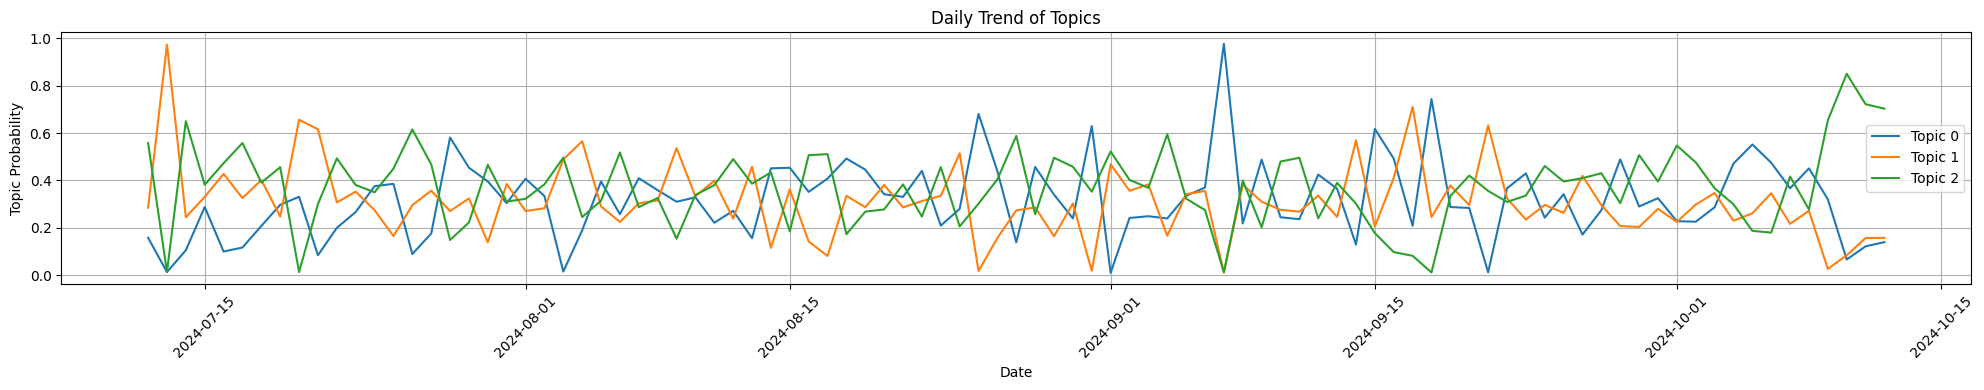

In [26]:
# prompt : 일자별로 각 토픽의 추세를 보여주는 시각화

# Assuming 'df' is your DataFrame with '일자' as index and topic probabilities
# Example: df['topic_0_prob'], df['topic_1_prob'], df['topic_2_prob']

# Resample the data to daily frequency (if needed)
# Select only numeric columns for calculating the mean

import matplotlib.pyplot as plt
import numpy as np

df_daily = df.select_dtypes(include=np.number).resample('D').mean()

plt.figure(figsize=(20, 4))

# Plotting each topic's trend
plt.plot(df_daily.index, df_daily['topic_0_prob'], label='Topic 0')
plt.plot(df_daily.index, df_daily['topic_1_prob'], label='Topic 1')
plt.plot(df_daily.index, df_daily['topic_2_prob'], label='Topic 2')


plt.xlabel('Date')
plt.ylabel('Topic Probability')
plt.title('Daily Trend of Topics')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

### 감성분석

### <font color ='red'> **(Start) 본문에서 직접 gensim을 적용하면 어떨까?**

In [27]:
df = pd.read_pickle(path).sample(frac=0.1)
df.head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,일자,본문
24689,2024-09-03,‘한강 보이는 공공주택’으로 유명한 서울 동작구 수방사 부지가 다음 달 분양한다. ...
329,2024-09-03,[이데일리 신민준 기자] SCL사이언스(246960)가 신규 경영진을 선임했다. S...


In [28]:
# Corpus를 documents로
documents_new = df['본문'].tolist()
processed_docs_new = [preprocess(doc) for doc in documents_new[:3]]
processed_docs_new

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['한강',
  '보이는',
  '공공주택',
  '으로',
  '유명한',
  '서울',
  '동작구',
  '수방사',
  '부지가',
  '다음',
  '분양한다',
  '인천',
  '계양',
  '블록',
  '사업장',
  '신도시',
  '최초로',
  '주인을',
  '찾는다',
  '다만',
  '분양가는',
  '사전청약',
  '추정',
  '분양가보다',
  '높아질',
  '전망이다',
  '본청약이',
  '지연되는',
  '동안',
  '주변',
  '시세와',
  '공사비가',
  '오르고',
  '오염토',
  '정화비용',
  '예상하지',
  '못한',
  '비용이',
  '발생한',
  '탓이다',
  '국토교통부에',
  '따르면',
  '동작구'],
 ['이데일리',
  '신민준',
  '기자',
  'scl사이언스',
  '신규',
  '경영진을',
  '선임했다',
  'scl사이언스가',
  '인공지능',
  'ai',
  '의료',
  '디지털',
  '헬스케어',
  '디지털',
  '바이오플랫폼',
  '사업을',
  '확대하기',
  '위한',
  '취지로',
  '풀이된다',
  'scl사이언스',
  'ci',
  '이미지',
  'scl사이언스',
  'scl사이언스는',
  '서울시',
  '영등포구에서',
  '열린',
  '임시주주총회에서',
  '백세연',
  '사내이사',
  '최정균',
  '사외이사를',
  '신규'],
 ['화순전남대학교병원',
  '첨단정밀의료산업화지원센터는',
  '최근',
  '이산친환경연구원과',
  '신약소재물질',
  '사업화를',
  '위한',
  '업무협약을',
  '체결했다고',
  '밝혔다',
  '사진',
  '기관은',
  '이번',
  '협약을',
  '통해',
  '신약소재물질',
  '천연물신약',
  '뉴트라슈티컬',
  '발굴',
  '공동',
  '연구개발',
  '사업화',
  '연구',
  '인적자원의',
  '교류',
  '비임상시험'

In [29]:
# prompt: nouns_from_processed_docs에서 1개 글자는 제외

# Assuming 'processed_docs_new' is defined as in the provided code.
# If not, make sure to define processed_docs_new before running this code.

okt = Okt()

nouns_from_processed_docs = []
for doc in processed_docs_new:
  # Join the tokens in the list 'doc' into a single string
  doc_string = " ".join(doc)
  nouns = okt.nouns(doc_string)
  # Filter out single-character nouns
  filtered_nouns = [noun for noun in nouns if len(noun) > 1]
  nouns_from_processed_docs.append(filtered_nouns)

nouns_from_processed_docs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['한강',
  '주택',
  '서울',
  '동작구',
  '수방사',
  '부지',
  '다음',
  '분양',
  '인천',
  '계양',
  '블록',
  '사업',
  '신도시',
  '최초',
  '주인',
  '다만',
  '분양',
  '사전',
  '청약',
  '추정',
  '분양',
  '전망',
  '청약',
  '지연',
  '동안',
  '주변',
  '시세',
  '사비',
  '오염',
  '정화',
  '비용',
  '예상',
  '비용',
  '발생',
  '국토교통부',
  '동작구'],
 ['이데일리',
  '신민준',
  '기자',
  '사이언스',
  '신규',
  '영진',
  '선임',
  '사이언스',
  '인공',
  '지능',
  '의료',
  '디지털',
  '스케',
  '디지털',
  '바이오',
  '플랫폼',
  '사업',
  '확대',
  '취지',
  '풀이',
  '사이언스',
  '이미지',
  '사이언스',
  '사이언스',
  '서울시',
  '영등포구',
  '임시',
  '주주총회',
  '사내',
  '이사',
  '최정',
  '사외이사',
  '신규'],
 ['화순',
  '전남대학교병원',
  '첨단',
  '정밀',
  '의료',
  '산업화',
  '지원',
  '센터',
  '최근',
  '이산',
  '친환경',
  '연구원',
  '신약',
  '소재',
  '물질',
  '사업',
  '업무',
  '협약',
  '체결',
  '사진',
  '기관',
  '이번',
  '협약',
  '통해',
  '신약',
  '소재',
  '물질',
  '천연물',
  '신약',
  '뉴트라슈티컬',
  '발굴',
  '공동',
  '연구개발',
  '사업',
  '연구',
  '인적자원',
  '교류',
  '임상시험',
  '대한',
  '협력',
  '화순',
  '전남대',
  '병원',
  '첨단',
  '정밀',
  '의료',
  '산업화']]

### <font color ='red'> **(End) 본문에서 직접 gensim을 적용하면 어떨까? 별 차이가 없는 듯**